In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [2]:
result_dir = '../results/FP_Truthful_Oracle_sigmoids_cucb/'

In [4]:
# Load the results
files_to_read = [file for file in os.listdir(result_dir) if file.startswith(f'agent_stats_')]
pattern = r'agent_stats_(\d+\.?\d*)'
results = {}
for file in files_to_read:
    match = re.search(pattern, file)
    if match:
        ctr_target = float(match.group(1))
        agent_stats = pd.read_csv(f'{result_dir}{file}')
        results[ctr_target] = agent_stats

In [5]:
grouped_results = {}
for ctr_target, agent_stats in results.items():
    curr_gr = agent_stats.groupby('Iteration').agg({'impressions': 'sum', 'clicks': 'sum', 'true_clicks': 'sum'}).reset_index()
    curr_gr['ctr'] = curr_gr['clicks'] / curr_gr['impressions']
    curr_gr['true_ctr'] = curr_gr['true_clicks'] / curr_gr['impressions']
    grouped_results[ctr_target] = curr_gr

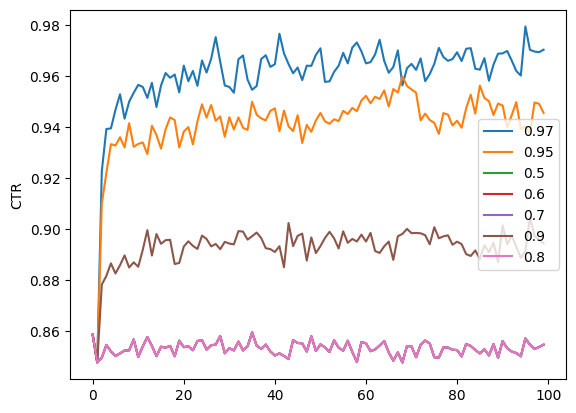

In [12]:
for ctr_target, gr_res in grouped_results.items():
    plt.plot(gr_res['Iteration'].to_numpy(), gr_res['ctr'].to_numpy(), label=f'{ctr_target}')
plt.ylabel('CTR')
plt.legend()
plt.show()

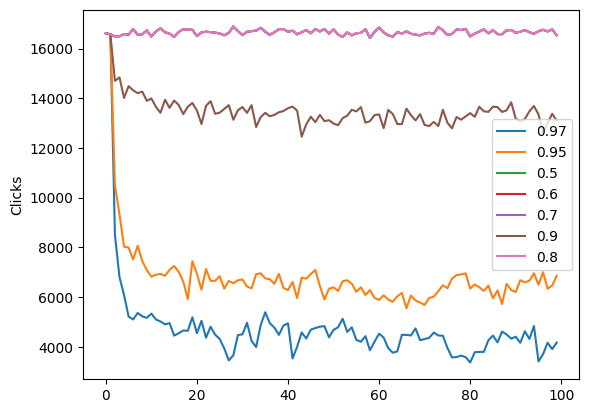

In [11]:
for ctr_target, gr_res in grouped_results.items():
    plt.plot(gr_res['Iteration'].to_numpy(), gr_res['clicks'].to_numpy(), label=f'{ctr_target}')
plt.ylabel('Clicks')
plt.legend()
plt.show()

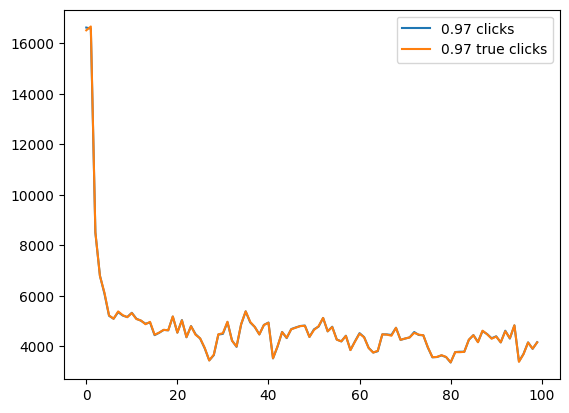

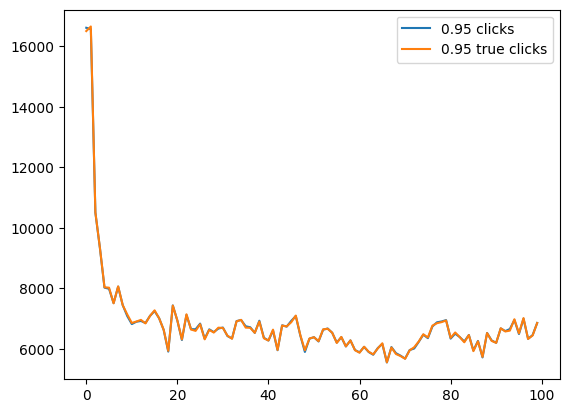

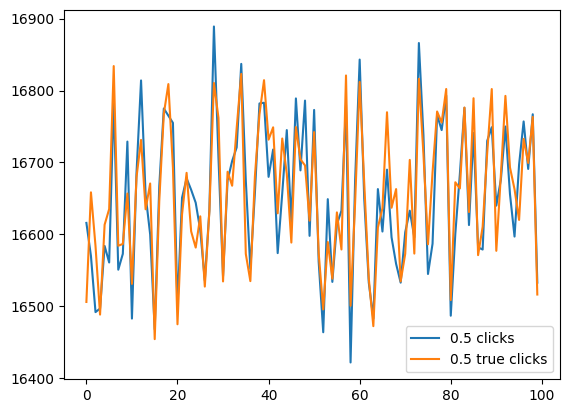

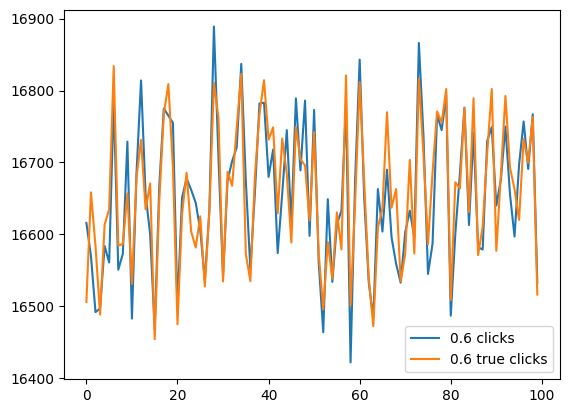

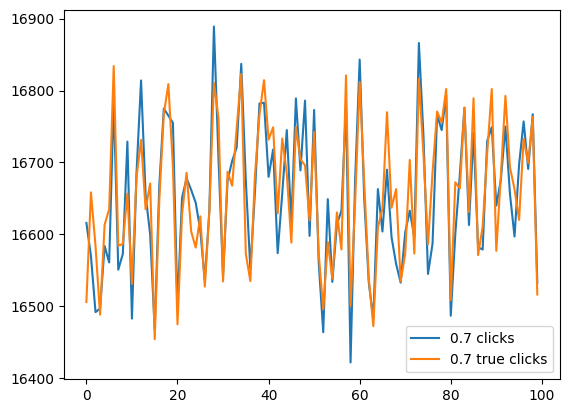

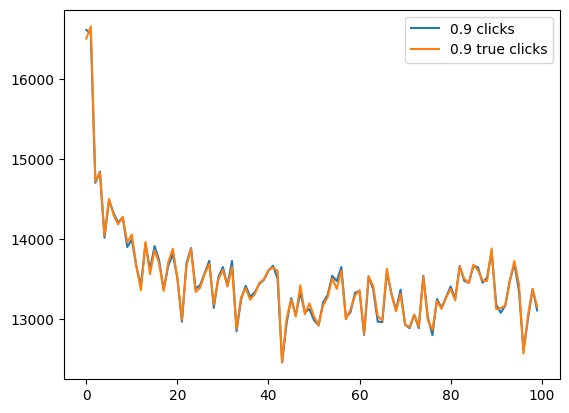

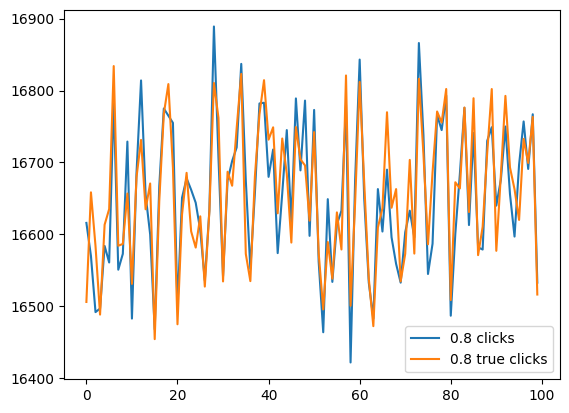

In [9]:
for ctr_target, gr_res in grouped_results.items():
    plt.plot(gr_res['Iteration'].to_numpy(), gr_res['clicks'].to_numpy(), label=f'{ctr_target} clicks')
    plt.plot(gr_res['Iteration'].to_numpy(), gr_res['true_clicks'].to_numpy(), label=f'{ctr_target} true clicks')    
    plt.legend()
    plt.show()

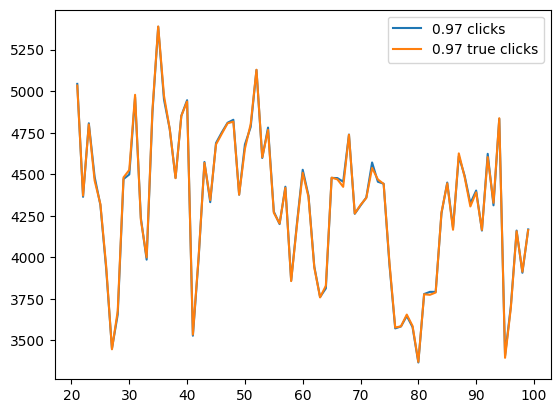

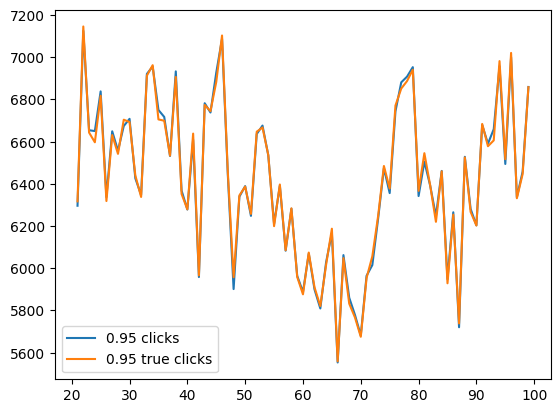

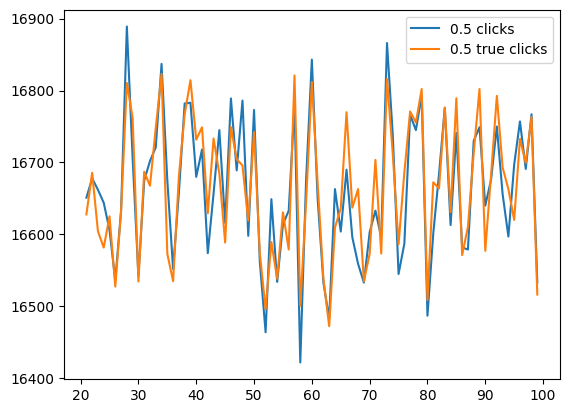

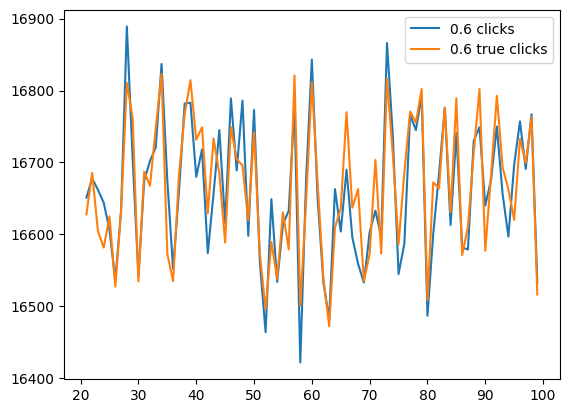

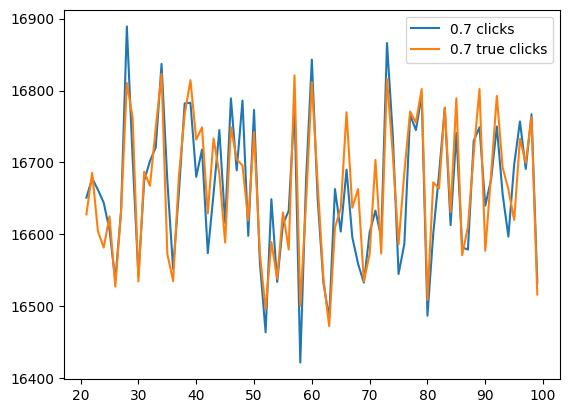

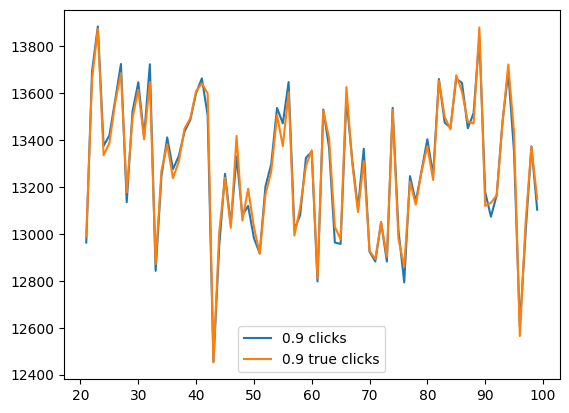

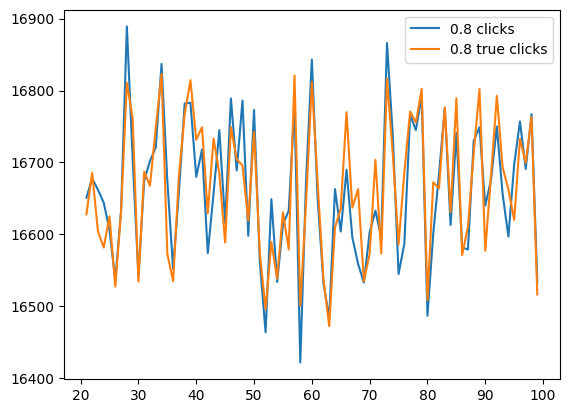

In [38]:
for ctr_target, gr_res in grouped_results.items():
    plt.plot(gr_res[gr_res['Iteration']>20]['Iteration'].to_numpy(), gr_res[gr_res['Iteration']>20]['clicks'].to_numpy(), label=f'{ctr_target} clicks')
    plt.plot(gr_res[gr_res['Iteration']>20]['Iteration'].to_numpy(), gr_res[gr_res['Iteration']>20]['true_clicks'].to_numpy(), label=f'{ctr_target} true clicks')    
    plt.legend()
    plt.show()

Nella simulazione ogni deal genera oltre l'80% di CTR, quindi knapsack agisce solo quando la soglia del CTR è 0.9, 0.95, 0.97. 

All'aumentare del CTR il numero di click diminuisce.

Quando la soglia è >= 0.9 la differenza tra i click veri e quelli osservati è quasi nulla.

## Quanti publisher sono sempre stati selezionati?

In [13]:
# Seleziono solo gli esperimenti con CTR target >= 0.9
relevant_res = {ctr_target: res for ctr_target, res in results.items() if ctr_target >= 0.9}

CTR medio per esperimento

In [14]:
for ctr_target, res in relevant_res.items():
    print(f'CTR medio per CTR target {ctr_target}: {res["clicks"].sum() / res["impressions"].sum()}')

CTR medio per CTR target 0.97: 0.9526076324861701
CTR medio per CTR target 0.95: 0.9374149641165751
CTR medio per CTR target 0.9: 0.8924430243785576


In [15]:
res_097 = relevant_res[0.97]

In [16]:
pub_gt_1iter = res_097[res_097['Iteration']>1]['publisher'].unique()
pub_only_1iter = res_097[~res_097['publisher'].isin(pub_gt_1iter)]

In [18]:
sorted([0,1]) == sorted([1,0])

True

In [19]:
# Verifico che i publisher che non appaiono dopo le prime 2 iterazioni lo fanno solo nelle prime due
assert sorted(pub_only_1iter['Iteration'].unique()) == [0,1]

In [21]:
print(f"Numero di publisher che appaiono solo nelle prime due iterazioni: {pub_only_1iter['publisher'].nunique()}")

Numero di publisher che appaiono solo nelle prime due iterazioni: 86


In [25]:
# CTR di questi publisher nelle prime due iterazioni
print(f"CTR dei publisher che appaiono solo nelle prime due iterazioni: {pub_only_1iter['clicks'].sum() / pub_only_1iter['impressions'].sum()}")

CTR dei publisher che appaiono solo nelle prime due iterazioni: 0.7227196693889599


In [26]:
# CTR prodotto nelle prime 2 iterazioni
print(f"CTR prodotto nelle prime due iterazioni: {res_097[res_097['Iteration']<=1]['clicks'].sum() / res_097[res_097['Iteration']<=1]['impressions'].sum()}")

CTR prodotto nelle prime due iterazioni: 0.8529570514303338


In [27]:
# CTR prodotto nelle successive iterazioni
print(f"CTR prodotto nelle iterazioni successive alla seconda: {res_097[res_097['Iteration']>1]['clicks'].sum() / res_097[res_097['Iteration']>1]['impressions'].sum()}")

CTR prodotto nelle iterazioni successive alla seconda: 0.9610358837685022


In [32]:
pub_count_iter = res_097.groupby('publisher').size().sort_values(ascending=False).reset_index().rename(columns={0: 'count'})
pub_count_iter[pub_count_iter['count']==100]

,publisher,count
0,it.motor1.com,100
1,moto.it,100
2,borsaitaliana.it,100
3,calculitineraires.fr,100
4,cincodias.elpais.com,100
5,coches.net,100
6,gazzettadimantova.it,100
7,leblogauto.com,100
8,fr.motorsport.com,100
9,autoruote4x4.com,100


In [33]:
pub_count_iter['count'].value_counts()

count
2      86
3      32
4      27
5      19
100    14
10     13
8      11
6      10
9      10
13      8
11      5
7       5
12      4
17      3
99      3
27      3
34      3
16      3
24      2
39      2
96      2
94      2
29      2
44      1
64      1
98      1
92      1
95      1
90      1
87      1
83      1
80      1
79      1
75      1
71      1
69      1
14      1
15      1
63      1
41      1
18      1
20      1
21      1
22      1
23      1
58      1
26      1
55      1
93      1
31      1
54      1
51      1
48      1
33      1
Name: count, dtype: int64

<AxesSubplot:xlabel='Iteration'>

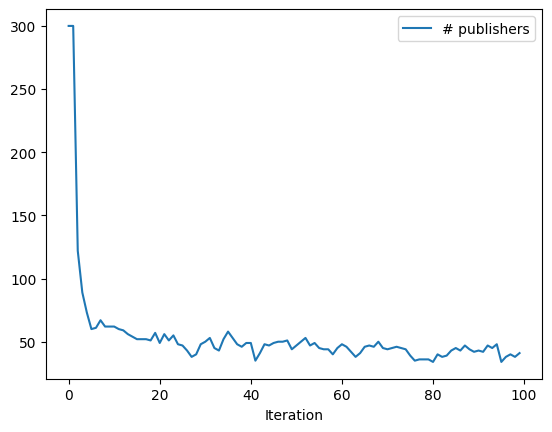

In [37]:
res_097.groupby('Iteration').size().reset_index().rename(columns={0: '# publishers'}).plot(x='Iteration', y='# publishers')